## Reiforment Learning Book 

http://www.incompleteideas.net/book/bookdraft2017nov5.pdf

## A k-armed Bandit Problem
Consider the following learning problem. You are faced repeatedly with a choice among k different options, or actions. After each choice you receive a numerical reward chosen from a stationary probability
distribution that depends on the action you selected. d. Your objective is to maximize the expected total
reward over some time period, for example, over 1000 action selections, or time steps.


This is the original form of the k-armed bandit problem, so named by analogy to a slot machine, or
“one-armed bandit,” except that it has k levers instead of one. Each action selection is like a play of one
of the slot machine’s levers, and the rewards are the payoffs for hitting the jackpot. Through repeated
action selections you are to maximize your winnings by concentrating your actions on the best levers.
Another analogy is that of a doctor choosing between experimental treatments for a series of seriously
ill patients. Each action is the selection of a treatment, and each reward is the survival or well-being of the patient. Today the term “bandit problem” is sometimes used for a generalization of the problem
described above, but in this book we use it to refer just to this simple case.
        

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class bandit():
    def __init__(self):
        self.mu = np.random.uniform(-3,3,1)
        self.sigma = np.random.uniform(0,1,1)
        
    def pull(self):
        return np.random.normal(self.mu,self.sigma,1)

In [5]:
k = 10
k_bandit = [bandit() for _ in range(k)]
print(k_bandit[0].pull())

[1.02205066]


## Action-value Methods
We begin by looking more closely at some simple methods for estimating the values of actions and for
using the estimates to make action selection decisions. Recall that the true value of an action is the
mean reward when that action is selected. One natural way to estimate this is by averaging the rewards
2.3. THE 10-ARMED TESTBED 21
actually received:
$$ Qt(a).= \frac{\text{sum of rewards when a taken prior to t}} {\text {number of times a taken prior to t}} $$
$$=Pt−1i=1 Ri· 1Ai=a Pt−1i=1 1Ai=a,$$

In [6]:
runs = 2_000
steps = 1_000

In [7]:
def ten_armed_testbed(k = 10, runs = 2_000, steps = 1_000, epsilon = 0.0 ):
    
    R_average = np.zeros((steps,))
    for _ in range(runs):
        #new problem
        k_bandit = [bandit() for _ in range(k)]  
        ## epsilon = .1
        Q = np.zeros((k,))                  #estimated value of action a 
        R = np.zeros((k,))                  #sum of rewards when a taken prior to t
        a_n = np.zeros((k,))                #number of times a is taken prior to t
        r_t = 0
        for t in range(steps):
            #epsilon less then .1 do random action
            if np.random.uniform(0,1,1) <= epsilon:
                A = np.random.randint(10,size=1)[0]
            else: 
                A = np.argmax(Q)              #action
                
            r_t = k_bandit[A].pull()          #rewart at time t from action A
            R_average[t] += r_t
            R[A] += r_t                       #sum of rewards when a taken prior to t
            a_n[A] +=1 
            Q[A] = R[A] / a_n[A]              #update action value 

    return R_average/(runs)

In [42]:
R_greedy =  ten_armed_testbed(runs = runs,steps = steps, epsilon = 0.0 )

### $\epsilon-greedy$

A simple alternative is to behave greedily most of the time, but every once in a while, say with small
probability ε, instead select randomly from among all the actions with equal probability, independently
of the action-value estimates. We call methods using this near-greedy action selection rule ε-greedy
methods. An advantage of these methods is that, in the limit as the number of steps increases, every
action will be sampled an infinite number of times, thus ensuring that all the Qt(a) converge to q∗(a).
This of course implies that the probability of selecting the optimal action converges to greater than
1 − ε, that is, to near certainty. These are just asymptotic guarantees, however, and say little about
the practical effectiveness of the methods.


In [43]:
R_1  = ten_armed_testbed(runs = runs,steps = steps, epsilon = 0.1 )
R_01 = ten_armed_testbed(runs = runs,steps = steps, epsilon = 0.01)

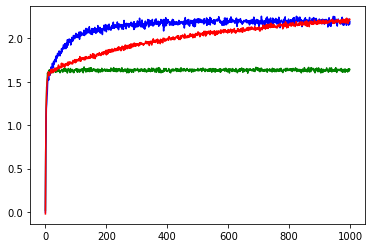

In [44]:
x = range(steps)
plt.plot(x, R_greedy, color='green')
plt.plot(x, R_1, color='blue')
plt.plot(x, R_01, color='red')
plt.show()

### Icremental Implementation
![alt text](simple_bandit_algorimthm.PNG "Simple Bandit Algorimthm")


In [26]:
def Incremental_testbed(k = 10, runs = 2_000,steps = 1_000, epsilon = 0.0 ):
    
    R_average = np.zeros((steps,))
    for _ in range(runs):
        #new random K_bandit problem
        k_bandit = [bandit() for _ in range(k)]  
        Q = np.zeros((k,))                    #estimated value of action a   
        N = np.zeros((k,))                    #number of times a is taken prior to t
        r_t = 0
        for t in range(steps):
            #epsilon less then .1 do random action
            if np.random.uniform(0,1,1) <= epsilon:
                A = np.random.randint(10,size=1)[0]
            else: 
                A = np.argmax(Q)              #action
                
            R = k_bandit[A].pull()          #rewart at time t from action A
            R_average[t] += R
            N[A] = N[A] +1 
            Q[A] =  Q[A] + (1.0/ N[A])*(R - Q[A])              #update action value 

    return R_average/(runs)


In [27]:
R_greedy =  Incremental_testbed(runs = runs,steps = steps, epsilon = 0.0 )
R_1  = Incremental_testbed(runs = runs,steps = steps, epsilon = 0.1 )
R_01 = Incremental_testbed(runs = runs,steps = steps, epsilon = 0.01)
x = range(steps)
plt.plot(x, R_greedy, color='green')
plt.plot(x, R_1, color='blue')
plt.plot(x, R_01, color='red')
plt.show()

TypeError: 'numpy.float64' object is not callable